# Вычислительная математика. Домашняя лабораторная работа №4.

## Выполнил: Хайдари Фарид, Б01 - 008.
## Номер: 4.3 (7)

In [167]:
import numpy as np
import matplotlib.pyplot as plt

x0 = 1 / np.sqrt(2)

In [168]:
def k(x):
    if x == x0:
        raise Exception("x == x0")
    return np.exp(np.sin(x)) if x < x0 else 1

def q(x):
    if x == x0:
        raise Exception("x == x0")
    return 2 if x < x0 else 1

def f(x):
    if x == x0:
        raise Exception("x == x0")
    return np.exp(x)

In [169]:
from itertools import chain

def directRunThrough(a, b, c, d, u, u0, uL, h, L, alpha, beta, l_alpha, l_beta):
    for l in chain(range(1, l_alpha), range(l_beta + 1, L - 1)):
        a[l] = k((l + 0.5) * h)
        b[l] = -(k((l + 0.5) * h) + k((l - 0.5) * h) + q(l * h) * h ** 2)
        c[l] = k((l - 0.5) * h)
        d[l] = -f(l * h) * h ** 2

    alpha[1] = -a[1] / b[1]
    beta[1]  = (d[1] - c[1] * u0) / b[1]

    alpha[-2] = -c[-2] / b[-2]
    beta[-2]  = (d[-2] - c[-2] * uL) / b[-2]   
    
    def for_body(alpha, beta, a, b, c, d):
        res_alpha = -a / (b + c * alpha)
        res_beta  = (d - c * beta) / (b + c * alpha)
        return res_alpha, res_beta

    for l in range(2, l_alpha):
        alpha[l], beta[l] = for_body(alpha[l - 1], beta[l - 1], c[l], b[l], a[l], d[l])
    for l in range(L - 3, l_beta, -1):
        alpha[l], beta[l] = for_body(alpha[l + 1], beta[l + 1], c[l], b[l], a[l], d[l])

    u[l_alpha] = (k(l_alpha * h) * beta[l_alpha - 1] + k(l_beta * h) * beta[l_beta + 1]) / (k(l_alpha * h) * (1 - alpha[l_alpha - 1]) + k(l_beta * h) * (1 - alpha[l_beta + 1]))
    u[l_beta] = u[l_alpha].copy()

    u[l_alpha - 1] = alpha[l_alpha - 1] * u[l_alpha] + beta[l_alpha - 1]
    u[l_beta + 1] = alpha[l_beta + 1] * u[l_beta] + beta[l_beta + 1]

def reverseRunThrough(u, L, alpha, beta, l_alpha, l_beta):
    for l in range(l_alpha - 1, 0, -1):
        u[l] = alpha[l] * u[l + 1] + beta[l]
    for l in range(l_beta + 1, L - 1):
        u[l] = alpha[l] * u[l - 1] + beta[l]

In [170]:
def solve(h):
    x_start, x_end = 0, 1
    u0, uL = 0, 1

    L = int(1 / h + 1)
    x = np.linspace(x_start, x_end, L)

    u = np.zeros(L)
    u[0], u[-1] = u0, uL

    l_alpha = int(np.floor(x0 / h))
    l_beta = l_alpha + 1

    a, b, c, d = [np.zeros(L) for _ in range(4)]
    alpha, beta = np.zeros(L), np.zeros(L)

    directRunThrough(a, b, c, d, u, u0, uL, h, L, alpha, beta, l_alpha, l_beta)
    reverseRunThrough(u, L, alpha, beta, l_alpha, l_beta)
    return x, u

In [171]:
plt.style.use('Solarize_Light2')

def draw(x, u):
    plt.figure(figsize=(16, 10))
    plt.plot(x, u)
    plt.xlabel("x")
    plt.ylabel("u(x)")
    plt.grid()
    plt.title("Решение краевой задачи")

    plt.vlines(x0, min(u), max(u), colors="gray", linestyles="dotted", label="Разрыв")
    plt.legend(loc = 'best', fontsize = 'small')


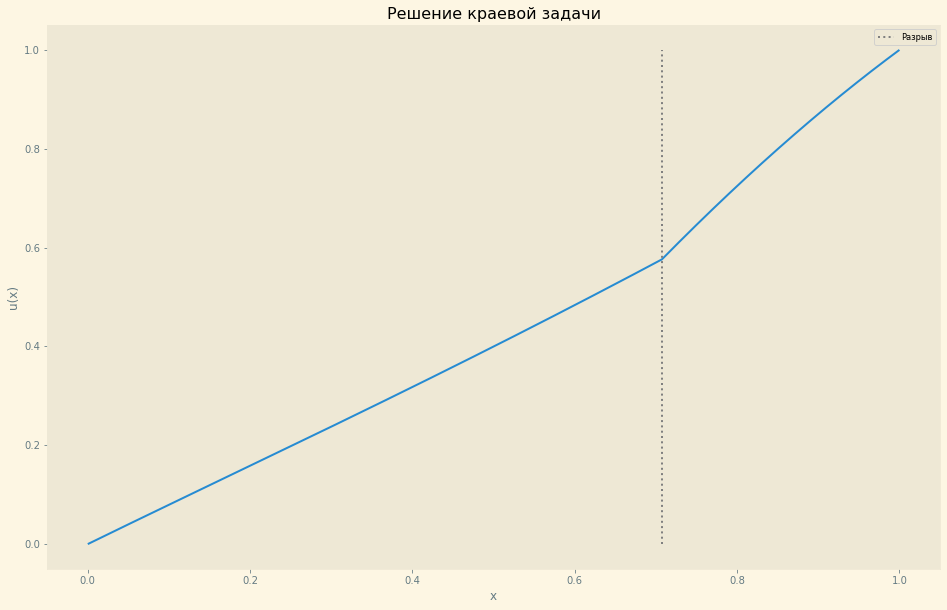

In [172]:
h = 0.0001
x, u = solve(h)
draw(x, u)